In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import random

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
# figures 
#
#fig = iris[iris.species=='setosa'].plot(kind='scatter', x='sepal_length'
#                                      , y='sepal_width', color='red', label='setosa')
#
#iris[iris.species=='versicolor'].plot(kind='scatter', x='sepal_length'
#                                      , y='sepal_width', color='blue', label='versicolor', ax=fig)
#
#iris[iris.species=='virginica'].plot(kind='scatter', x='sepal_length'
#                                      , y='sepal_width', color='green', label='virginica',  ax=fig)
#
#fig.set_xlabel('Sepal length')
#fig.set_ylabel('Sepal width')
#fig.set_title('Sepal length vs. width')
#fig = plt.gcf
##plt.figure(figsize=(6,8))
#plt.show()

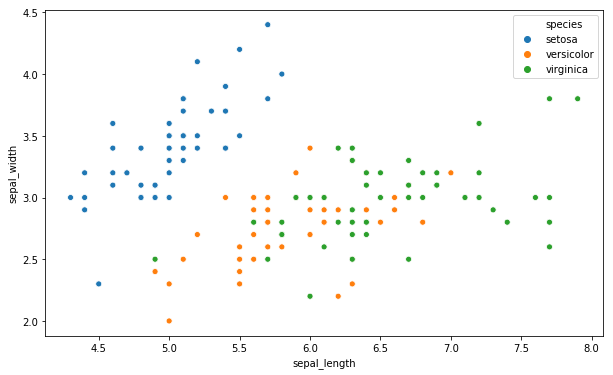

In [5]:
# Visualization in terms of sepal length and width

plt.figure(figsize=(10,6))
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species')

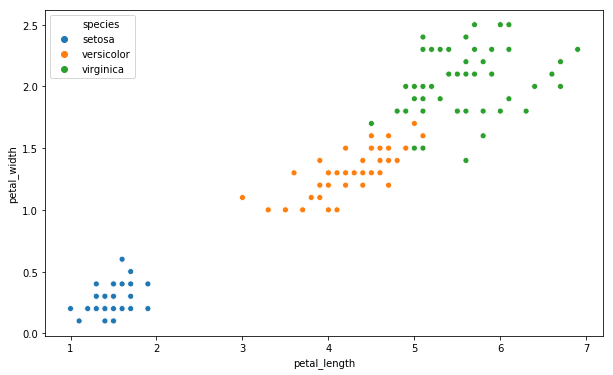

In [6]:
# # Visualization in terms of petal length and width

plt.figure(figsize=(10,6))

sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')


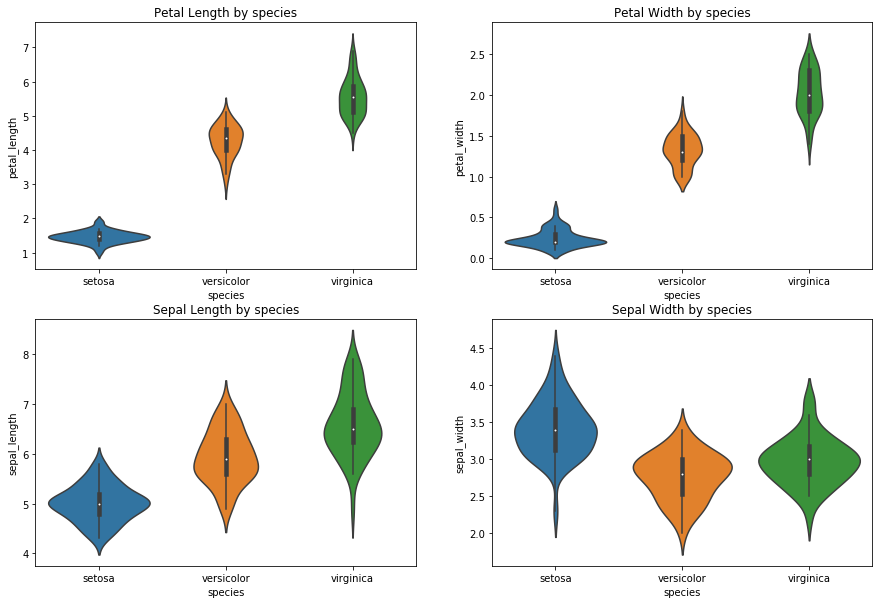

In [9]:
#

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.violinplot(x='species', y='petal_length', data=iris)
plt.title('Petal Length by species')

plt.subplot(2,2,2)
sns.violinplot(x='species', y='petal_width', data=iris)
plt.title('Petal Width by species')

plt.subplot(2,2,3)
sns.violinplot(x='species', y='sepal_length', data=iris)
plt.title('Sepal Length by species')

plt.subplot(2,2,4)
sns.violinplot(x='species', y='sepal_width', data=iris)
plt.title('Sepal Width by species')

plt.show()

In [18]:
from sklearn.cross_validation import train_test_split 

from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 

from sklearn import metrics
from sklearn.model_selection import cross_val_score


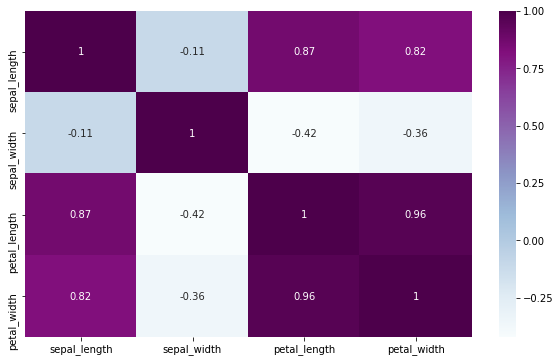

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(iris.corr(), annot=True, cmap='BuPu')

In [35]:
train, test = train_test_split(iris, test_size=.3)

In [36]:
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [37]:
iris.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [38]:
train_X = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
train_y = train.species

test_X = test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
test_y = test.species

In [39]:
NBclassifier = BernoulliNB()
NBclassifier.fit(train_X, train_y)
y_pred = NBclassifier.predict(test_X)
print('Accuracy of NB classifier: ', metrics.accuracy_score(y_pred, test_y))

print('Mean CV score: ', (cross_val_score(NBclassifier, train_X, train_y, cv=10)).mean())


Accuracy of NB classifier:  0.28888888888888886
Mean CV score:  0.3527272727272728


In [40]:
LogReg = LogisticRegression()
LogReg.fit(train_X, train_y)
y_pred = LogReg.predict(test_X)

print("accuracy ",  metrics.accuracy_score(y_pred, test_y))

print("Mean CV score: ", (cross_val_score(LogReg, train_X, train_y, cv=10)).mean())

accuracy  0.9333333333333333
Mean CV score:  0.9395959595959595


In [41]:
from sklearn.model_selection import cross_val_score
LogReg1 = LogisticRegression()
print(cross_val_score(LogReg1, train_X, train_y, cv=10))
    
print("Mean CV score: ", (cross_val_score(LogReg1, train_X, train_y, cv=10)).mean())

[1.         1.         1.         1.         0.81818182 1.
 0.8        0.88888889 0.88888889 1.        ]
Mean CV score:  0.9395959595959595


In [42]:
deciTree = DecisionTreeClassifier()
deciTree.fit(train_X, train_y)
y_pred = deciTree.predict(test_X)

print("accuracy", metrics.accuracy_score(y_pred, test_y))

print("Mean CV score: ", (cross_val_score(deciTree, train_X, train_y, cv=10)).mean())

accuracy 0.9111111111111111
Mean CV score:  0.9916666666666666


In [43]:
knn = KNeighborsClassifier()
knn.fit(train_X, train_y)
y_pred = knn.predict(test_X)
print('accuracy', metrics.accuracy_score(y_pred, test_y))
print("Mean CV score: ", (cross_val_score(knn, train_X, train_y, cv=10)).mean())

accuracy 0.9333333333333333
Mean CV score:  0.9805555555555555


In [49]:
np.arange(1,16)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [56]:
((cross_val_score(knn, train_X, train_y, cv=10)).mean()).astype(float)

0.9714646464646464

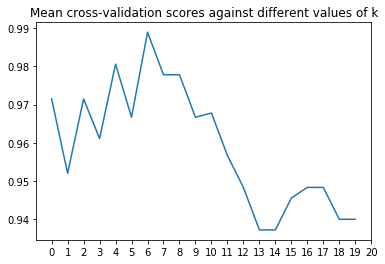

In [80]:
# error graph for knn

cv = []
cv_series = pd.Series()

for i in np.arange(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_X, train_y)
    y_pred = knn.predict(test_X)
    cv_mean = (cross_val_score(knn, train_X, train_y, cv=10)).mean()
    cv.append(cv_mean)
    
    cv_series = cv_series.append(pd.Series(metrics.accuracy_score(y_pred, test_y)))

plt.plot(cv)
plt.title("Mean cross-validation scores against different values of k")
plt.xticks(np.arange(21))
plt.show()

#plt.plot(cv_series)
#plt.title("Different accuracies with different values of k")
#plt.show()

In [45]:
svm = svm.SVC()
svm.fit(train_X, train_y)
pred_y = svm.predict(test_X)
print("SVM accuracy: ", metrics.accuracy_score(y_pred, test_y))
print("Mean CV score: ", (cross_val_score(svm, train_X, train_y, cv=10)).mean())

SVM accuracy:  0.9333333333333333
Mean CV score:  0.9566666666666667
